In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [2]:
df = pd.read_sql_table('microwave', 'sqlite:///dissertation.db') 

In [3]:
df_copy = df.copy()

In [4]:
df_copy

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
0,2019-12-23 00:00:00,0.0,-1,0,0,0,weekday,0.0
1,2019-12-23 00:00:10,0.0,-1,0,0,0,weekday,0.0
2,2019-12-23 00:00:20,0.0,-1,0,0,0,weekday,0.0
3,2019-12-23 00:00:30,0.0,-1,0,0,0,weekday,0.0
4,2019-12-23 00:00:40,0.0,-1,0,0,0,weekday,0.0
...,...,...,...,...,...,...,...,...
1451515,2020-06-07 23:59:10,0.0,23,6,23,59,holiday,0.0
1451516,2020-06-07 23:59:20,0.0,23,6,23,59,holiday,0.0
1451517,2020-06-07 23:59:30,0.0,23,6,23,59,holiday,0.0
1451518,2020-06-07 23:59:40,0.0,23,6,23,59,holiday,0.0


In [35]:
week = pd.DataFrame({'Week_kWh' : (df_copy.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
day = pd.DataFrame({'day_kWh' : (df_copy.groupby( ['day_name'])['kWh'].sum()/24)}).reset_index()
hour = pd.DataFrame({'hour_kWh' : (df_copy.groupby( ['hour'])['kWh'].sum()/24)}).reset_index()

In [36]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,1.544601
std,7.144345,1.565475
min,-1.000000,0.000000
25%,5.750000,0.000000
50%,11.500000,1.031017
75%,17.250000,2.915839
max,23.000000,4.184660


In [37]:
day

,day_name,day_kWh
0,0,0.300057
1,1,0.281123
2,2,0.309591
3,3,0.242123
4,4,0.261571
5,5,0.080681
6,6,0.069456


In [16]:
hour

,hour,hour_kWh
0,0,1.157407e-07
1,1,4.050926e-07
2,2,6.365741e-07
3,3,2.893519e-07
4,4,4.050926e-07
5,5,4.868056e-04
6,6,2.125966e-02
7,7,1.516939e-02
8,8,1.333218e-03
9,9,1.805735e-02


In [17]:
hour['hour_kWh'][0:7].sum()

0.02174832175925924

In [18]:
hour['hour_kWh'][22:23].sum()

2.8935185185185185e-07

In [19]:
hour['hour_kWh'].sum()

1.5446014074274517

## Clustering Starts from Here

In [20]:
df_clustering =pd.read_sql_table('microwave_tsfel', 'sqlite:///dissertation.db')

In [21]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     140 non-null    int64  
 1   0_Absolute energy         140 non-null    float64
 2   0_Mean                    140 non-null    float64
 3   0_Max                     140 non-null    float64
 4   0_Standard deviation      140 non-null    float64
 5   0_FFT mean coefficient_0  140 non-null    float64
 6   0_Spectral kurtosis       140 non-null    float64
 7   0_Skewness                140 non-null    float64
 8   0_Zero crossing rate      140 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.0 KB


In [22]:
df_clustering['time'] = pd.date_range(start="12/23/2019", end="05/10/2020", freq='D')

In [23]:
# prepare data for clustering
df_clustering['weekofyear']=df_clustering['time'].dt.week
df_clustering['day_categ']=df_clustering['time'].dt.day_name()
df_clustering['day_num']=df_clustering['time'].dt.weekday
df_clustering['day']=df_clustering['time'].dt.day


df_clustering['day_type'] = df_clustering['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_clustering.loc[(df_clustering.time >= '2019-12-24') & (df_clustering.time < '2019-12-26'), 'day_type']='holiday' #christmas
df_clustering.loc[(df_clustering.time == '2020-01-01'), 'day_type']='holiday' #new year
# lockdown week 13
df_clustering.loc[(df_clustering.weekofyear >12) & (df_clustering.weekofyear <25), 'day_type'] = 'holiday'

In [24]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     140 non-null    int64         
 1   0_Absolute energy         140 non-null    float64       
 2   0_Mean                    140 non-null    float64       
 3   0_Max                     140 non-null    float64       
 4   0_Standard deviation      140 non-null    float64       
 5   0_FFT mean coefficient_0  140 non-null    float64       
 6   0_Spectral kurtosis       140 non-null    float64       
 7   0_Skewness                140 non-null    float64       
 8   0_Zero crossing rate      140 non-null    float64       
 9   time                      140 non-null    datetime64[ns]
 10  weekofyear                140 non-null    int64         
 11  day_categ                 140 non-null    object        
 12  day_num               

In [25]:
df_clustering_ok=df_clustering.drop(['index','weekofyear','time','day','day_num'],axis=1)
df_clustering_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   0_Zero crossing rate      140 non-null    float64
 8   day_categ                 140 non-null    object 
 9   day_type                  140 non-null    object 
dtypes: float64(8), object(2)
memory usage: 11.1+ KB


In [26]:
df_dum = pd.get_dummies(df_clustering_ok)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   0_Zero crossing rate      140 non-null    float64
 8   day_categ_Friday          140 non-null    uint8  
 9   day_categ_Monday          140 non-null    uint8  
 10  day_categ_Saturday        140 non-null    uint8  
 11  day_categ_Sunday          140 non-null    uint8  
 12  day_categ_Thursday        140 non-null    uint8  
 13  day_categ_Tuesday         140 non-null    uint8  
 14  day_categ_

In [27]:
df_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ_Friday,day_categ_Monday,day_categ_Saturday,day_categ_Sunday,day_categ_Thursday,day_categ_Tuesday,day_categ_Wednesday,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.998956,0.723377,0.960875,0.717528,0.604842,-0.058120,0.851435,0.052432,0.133953,-0.211212,-0.227817,0.040511,0.084100,0.128033,-0.638089,0.760928,-0.179119
0_Mean,0.998956,1.000000,0.713781,0.956995,0.715369,0.594949,-0.061006,0.838918,0.054742,0.132961,-0.218045,-0.232654,0.037323,0.089864,0.135809,-0.632342,0.765300,-0.191845
0_Max,0.723377,0.713781,1.000000,0.871593,0.511838,0.941347,0.233484,0.698362,0.022280,0.064010,-0.055415,-0.013641,-0.019068,0.064832,-0.062998,-0.854935,0.648144,0.234380
0_Standard deviation,0.960875,0.956995,0.871593,1.000000,0.683698,0.766884,0.016341,0.851576,0.062459,0.125476,-0.178143,-0.183446,0.027561,0.087170,0.058923,-0.759628,0.790422,-0.065778
0_FFT mean coefficient_0,0.717528,0.715369,0.511838,0.683698,1.000000,0.427601,-0.045232,0.543937,0.001316,0.015909,-0.099384,-0.152120,0.036849,0.049492,0.147938,-0.454281,0.499737,-0.073876
0_Spectral kurtosis,0.604842,0.594949,0.941347,0.766884,0.427601,1.000000,0.365931,0.583297,0.020248,0.034119,-0.029488,0.013987,-0.018385,0.023664,-0.044146,-0.825909,0.579865,0.285528
0_Skewness,-0.058120,-0.061006,0.233484,0.016341,-0.045232,0.365931,1.000000,0.002533,0.027180,-0.093182,0.043840,0.059180,-0.014783,-0.074927,0.052693,-0.397044,0.186766,0.254774
0_Zero crossing rate,0.851435,0.838918,0.698362,0.851576,0.543937,0.583297,0.002533,1.000000,0.084413,0.126620,-0.175319,-0.193176,0.042207,0.073050,0.042207,-0.598393,0.677575,-0.121972
day_categ_Friday,0.052432,0.054742,0.022280,0.062459,0.001316,0.020248,0.027180,0.084413,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Monday,0.133953,0.132961,0.064010,0.125476,0.015909,0.034119,-0.093182,0.126620,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966


<Figure size 2160x720 with 0 Axes>

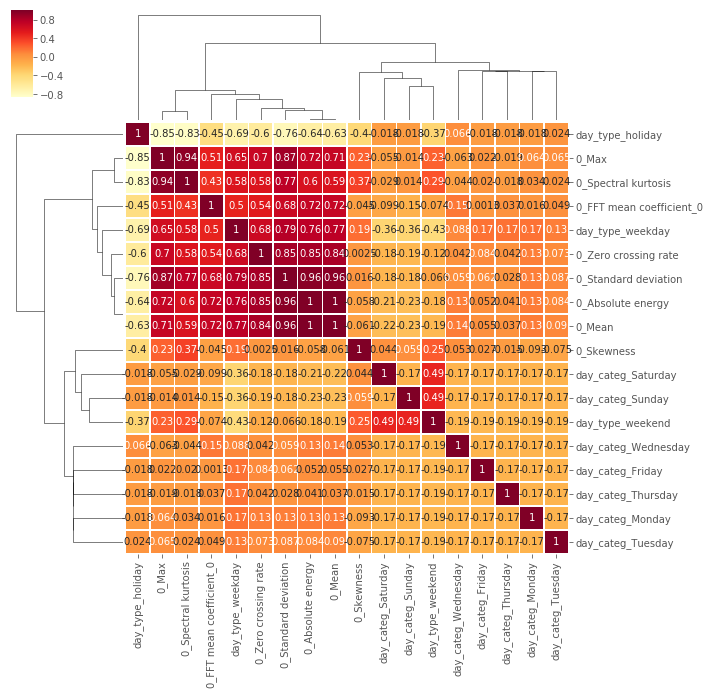

In [28]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr = df_dum.corr()

ax_ =sns.clustermap(corr,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

In [29]:
from sklearn.cluster import KMeans

In [30]:
# before clustering the values needing scaled 
import sklearn.preprocessing as preprocessing
df_scaled = preprocessing.scale(df_dum) 

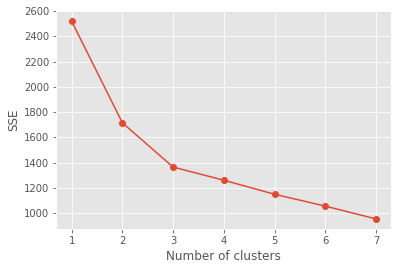

In [31]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 7
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [32]:
k_cluster = 2 
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [33]:
# assign labels to original dataframe
df_label=df_clustering_ok.assign(label=kmeans_method.labels_)

In [34]:
df_label.loc[df_label.label==0]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
0,0.000994,0.000030,0.004037,0.000338,2.025161e-09,4.239453,11.192629,18.0,Monday,weekday,0
3,0.000289,0.000008,0.004137,0.000183,9.963361e-11,4.045868,21.875818,10.0,Thursday,weekday,0
4,0.001708,0.000053,0.004165,0.000441,2.715890e-09,3.780788,8.474256,48.0,Friday,weekday,0
5,0.001686,0.000054,0.004090,0.000439,1.310853e-09,2.887895,8.349074,34.0,Saturday,weekend,0
6,0.001806,0.000058,0.004100,0.000453,7.216277e-09,3.013753,8.003627,38.0,Sunday,weekend,0
7,0.000280,0.000008,0.004108,0.000180,9.945022e-11,5.782335,21.759773,16.0,Monday,weekday,0
8,0.000651,0.000021,0.004064,0.000274,9.017647e-10,2.078020,13.395201,24.0,Tuesday,weekday,0
10,0.001633,0.000051,0.004112,0.000432,3.146100e-09,4.325202,8.558378,64.0,Thursday,weekday,0
11,0.000725,0.000024,0.004068,0.000289,8.044784e-10,3.163834,12.551879,22.0,Friday,weekday,0
14,0.001786,0.000058,0.004037,0.000451,2.383236e-09,3.980574,7.792097,40.0,Monday,weekday,0


## Daily Clustering Starts from Here

In [38]:
df_hour = pd.read_sql_table('microwave_hourtsfel', 'sqlite:///dissertation.db')

In [39]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3360 non-null   int64  
 1   0_Absolute energy         3360 non-null   float64
 2   0_Mean                    3360 non-null   float64
 3   0_Max                     3360 non-null   float64
 4   0_Standard deviation      3360 non-null   float64
 5   0_FFT mean coefficient_0  3360 non-null   float64
 6   0_Spectral kurtosis       3360 non-null   float64
 7   0_Skewness                3360 non-null   float64
 8   0_Zero crossing rate      3360 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 236.4 KB


In [40]:
df_hour['time'] = pd.date_range(start="12/23/2019 00:00:00", end="05/10/2020 23:00:00", freq='H')

In [41]:
# prepare data for clustering
df_hour['weekofyear']=df_hour['time'].dt.week
df_hour['day_categ']=df_hour['time'].dt.day_name()
df_hour['day_num']=df_hour['time'].dt.weekday
df_hour['day']=df_hour['time'].dt.day
df_hour['hour']=df_hour['time'].dt.hour
df_hour['hour']=df_hour['hour'].astype('object')

df_hour['day_type'] = df_hour['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_hour.loc[(df_hour.time >= '2019-12-24 00:00:00') & (df_hour.time < '2019-12-26 00:00:00'), 'day_type']='holiday' #christmas
df_hour.loc[(df_hour.time >= '2020-01-01 00:00:00') & (df_hour.time < '2020-01-02 00:00:00'), 'day_type']='holiday' #new year
# lockdown week 13
df_hour.loc[(df_hour.weekofyear >12) & (df_hour.weekofyear <25), 'day_type'] = 'holiday'

In [42]:
df_hour_ok=df_hour.drop(['index','weekofyear','time','day','day_num'],axis=1)
df_hour_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   0_Zero crossing rate      3360 non-null   float64
 8   day_categ                 3360 non-null   object 
 9   hour                      3360 non-null   object 
 10  day_type                  3360 non-null   object 
dtypes: float64(8), object(3)
memory usage: 288.9+ KB


In [43]:
df_hour_dum = pd.get_dummies(df_hour_ok)
df_hour_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   0_Zero crossing rate      3360 non-null   float64
 8   day_categ_Friday          3360 non-null   uint8  
 9   day_categ_Monday          3360 non-null   uint8  
 10  day_categ_Saturday        3360 non-null   uint8  
 11  day_categ_Sunday          3360 non-null   uint8  
 12  day_categ_Thursday        3360 non-null   uint8  
 13  day_categ_Tuesday         3360 non-null   uint8  
 14  day_cate

In [44]:
df_hour_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ_Friday,day_categ_Monday,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.998918,0.669970,0.905245,0.619164,0.598126,0.067025,0.764618,1.481603e-02,3.785183e-02,...,-6.307740e-03,1.785584e-03,-2.211210e-02,-3.398687e-02,-4.947777e-02,-4.947778e-02,-4.947777e-02,-1.803077e-01,2.150189e-01,-5.061445e-02
0_Mean,0.998918,1.000000,0.658521,0.895849,0.623072,0.586746,0.064971,0.759032,1.542299e-02,3.746043e-02,...,-9.039961e-03,-1.382144e-03,-2.377554e-02,-3.420843e-02,-4.882211e-02,-4.882307e-02,-4.882275e-02,-1.781561e-01,2.156158e-01,-5.405038e-02
0_Max,0.669970,0.658521,1.000000,0.898776,0.405863,0.901062,0.308041,0.749324,3.494594e-02,3.865310e-02,...,2.355672e-02,1.986649e-02,-1.412290e-02,-2.505446e-02,-7.341000e-02,-7.343260e-02,-7.342565e-02,-2.664950e-01,2.950382e-01,-4.573613e-02
0_Standard deviation,0.905245,0.895849,0.898776,1.000000,0.543153,0.815335,0.174306,0.830885,2.741457e-02,4.358799e-02,...,1.329484e-02,1.998481e-02,-1.793170e-02,-3.419566e-02,-6.603646e-02,-6.604284e-02,-6.604079e-02,-2.397844e-01,2.699411e-01,-4.686733e-02
0_FFT mean coefficient_0,0.619164,0.623072,0.405863,0.543153,1.000000,0.349061,0.041672,0.365692,-3.859550e-03,2.070591e-02,...,2.889762e-02,3.691804e-03,-2.380704e-02,-2.247963e-02,-3.011448e-02,-3.011448e-02,-3.011448e-02,-1.106149e-01,1.272504e-01,-2.509981e-02
0_Spectral kurtosis,0.598126,0.586746,0.901062,0.815335,0.349061,1.000000,0.549948,0.731940,4.360332e-02,3.765512e-02,...,1.970010e-02,2.550609e-02,-1.388834e-02,-2.890991e-02,-5.093049e-02,-7.583368e-02,-6.786347e-02,-2.993747e-01,3.155852e-01,-3.112791e-02
0_Skewness,0.067025,0.064971,0.308041,0.174306,0.041672,0.549948,1.000000,0.330201,1.829871e-02,7.636251e-03,...,2.120086e-03,-1.842607e-02,-1.487530e-02,-1.852140e-02,2.295276e-02,-4.053275e-02,-2.002086e-02,-2.347326e-01,2.194722e-01,1.132135e-02
0_Zero crossing rate,0.764618,0.759032,0.749324,0.830885,0.365692,0.731940,0.330201,1.000000,3.272449e-02,4.972839e-02,...,-1.533302e-02,-5.220249e-03,-2.263669e-02,-4.061495e-02,-4.117677e-02,-6.140231e-02,-5.353682e-02,-2.359242e-01,2.669451e-01,-4.783676e-02
day_categ_Friday,0.014816,0.015423,0.034946,0.027415,-0.003860,0.043603,0.018299,0.032724,1.000000e+00,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Monday,0.037852,0.037460,0.038653,0.043588,0.020706,0.037655,0.007636,0.049728,-1.666667e-01,1.000000e+00,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01


<Figure size 2160x720 with 0 Axes>

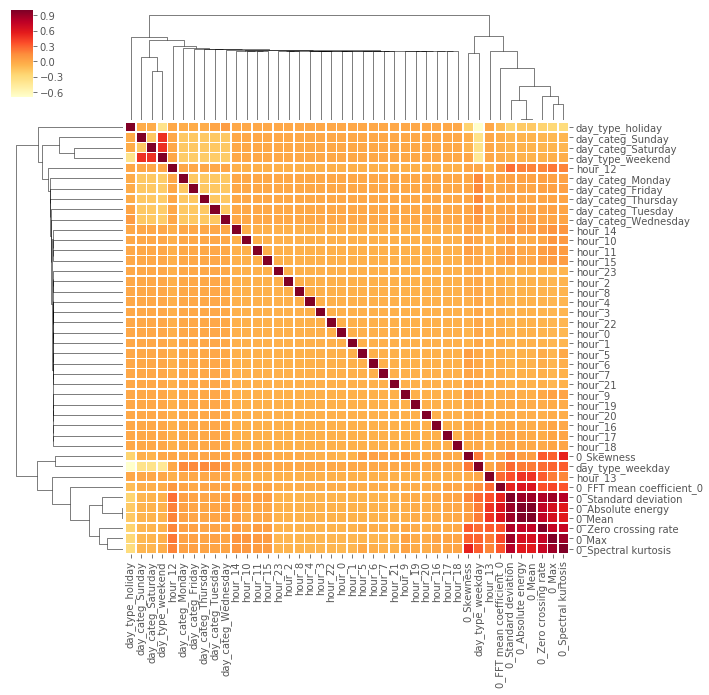

In [45]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr_hour = df_hour_dum.corr()

ax_ =sns.clustermap(corr_hour,linewidth=0.5 ,cmap="YlOrRd",annot=False,annot_kws={"size": 10})

In [46]:
df_hour_scaled = preprocessing.scale(df_hour_dum) 

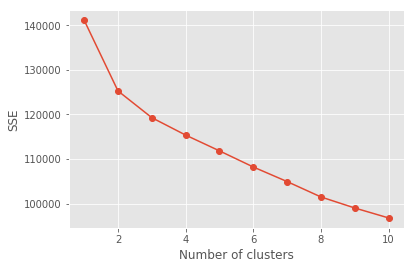

In [47]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 10
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

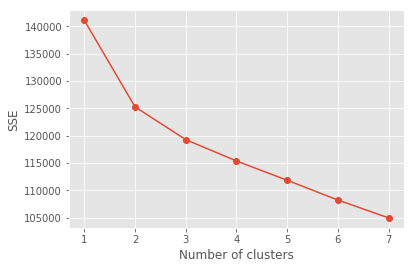

In [62]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 7
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [48]:
hour_k_cluster = 2
random_seed = 1
hour_kmeans_method = KMeans(n_clusters=hour_k_cluster,random_state=random_seed)
hour_kmeans_method.fit(df_hour_scaled)

KMeans(n_clusters=2, random_state=1)

In [49]:
df_hour_label=df_hour_ok.assign(label=hour_kmeans_method.labels_)

In [50]:
df_hour_gr1=df_hour_label.loc[df_hour_label.label==1]

In [52]:
df_hour_gr2=df_hour_label.loc[df_hour_label.label==0]

In [63]:
pd.set_option('display.max_rows', None)

In [67]:
df_hour_gr2

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,hour,day_type,label
12,243.930910,0.178596,4.027778,0.803548,2.126428e-03,3.882014,4.395218,8.0,Monday,12,weekday,0
13,551.935511,0.408399,3.941667,1.168916,1.111873e-02,4.622325,2.545817,8.0,Monday,13,weekday,0
17,198.188331,0.143206,4.037500,0.728021,1.367198e-03,4.581811,5.018622,2.0,Monday,17,weekday,0
36,261.688449,0.188125,4.083333,0.831578,2.359401e-03,6.199495,4.292340,6.0,Tuesday,12,holiday,0
43,263.976744,0.186782,4.109722,0.835692,2.325845e-03,5.212996,4.322806,8.0,Tuesday,19,holiday,0
85,288.647257,0.200594,4.137500,0.872674,2.682534e-03,4.133500,4.137275,4.0,Thursday,13,weekday,0
107,178.800135,0.134259,4.109722,0.691839,1.131732e-03,3.300968,5.363526,8.0,Friday,11,weekday,0
108,586.548810,0.454441,3.980556,1.192806,1.376775e-02,3.273998,2.397804,6.0,Friday,12,weekday,0
111,289.782074,0.204803,4.080556,0.873502,2.796291e-03,4.499584,4.074468,8.0,Friday,15,weekday,0
114,443.563237,0.322407,4.165278,1.062155,5.078699e-04,4.915796,3.063713,10.0,Friday,18,weekday,0


In [65]:
df_hour_gr2.groupby('hour').count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
hour,,,,,,,,,,,
8,1,1,1,1,1,1,1,1,1,1,1
9,23,23,23,23,23,23,23,23,23,23,23
10,37,37,37,37,37,37,37,37,37,37,37
11,32,32,32,32,32,32,32,32,32,32,32
12,62,62,62,62,62,62,62,62,62,62,62
13,61,61,61,61,61,61,61,61,61,61,61
14,40,40,40,40,40,40,40,40,40,40,40
15,31,31,31,31,31,31,31,31,31,31,31
16,19,19,19,19,19,19,19,19,19,19,19


In [66]:
df_hour_gr1.groupby('hour').count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
hour,,,,,,,,,,,
0,140,140,140,140,140,140,140,140,140,140,140
1,140,140,140,140,140,140,140,140,140,140,140
2,140,140,140,140,140,140,140,140,140,140,140
3,140,140,140,140,140,140,140,140,140,140,140
4,140,140,140,140,140,140,140,140,140,140,140
5,140,140,140,140,140,140,140,140,140,140,140
6,140,140,140,140,140,140,140,140,140,140,140
7,140,140,140,140,140,140,140,140,140,140,140
8,139,139,139,139,139,139,139,139,139,139,139
